In [1]:
import pandas as pd
df = pd.read_excel('datasets/credit/default of credit card clients.xls', header=1, index_col=0)


In [2]:
df.head()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
df.shape


(30000, 24)

In [4]:
def clean_dataset(df):
    df.loc[~df.EDUCATION.isin([1,2,3,4]), "EDUCATION"] = pd.np.nan
    for i in [0,2,3,4,5,6]:
        df.loc[df['PAY_{}'.format(i)]<-1] = pd.np.nan
    df.dropna(inplace=True)

clean_dataset(df)

In [5]:
df.shape


(23188, 24)

In [6]:
def process_categorical_features(df):
    dummies_education = pd.get_dummies(df.EDUCATION, prefix="EDUCATION", drop_first=True)
    dummies_marriage = pd.get_dummies(df.MARRIAGE, prefix="MARRIAGE", drop_first=True)
    df.drop(["EDUCATION", "MARRIAGE"], axis=1, inplace=True)
    return pd.concat([df, dummies_education, dummies_marriage], axis=1)
df = process_categorical_features(df)

In [7]:
df.head()


,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_2.0,EDUCATION_3.0,EDUCATION_4.0,MARRIAGE_1.0,MARRIAGE_2.0,MARRIAGE_3.0
ID,,,,,,,,,,,,,,,,,,,,,
2,120000.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,...,1000.0,0.0,2000.0,1.0,1,0,0,0,1,0
3,90000.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,...,1000.0,1000.0,5000.0,0.0,1,0,0,0,1,0
4,50000.0,2.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,...,1100.0,1069.0,1000.0,0.0,1,0,0,1,0,0
5,50000.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,...,9000.0,689.0,679.0,0.0,1,0,0,1,0,0
6,50000.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,64400.0,...,1000.0,1000.0,800.0,0.0,0,0,0,0,1,0


In [8]:
y = df['default payment next month']
X = df[[col for col in df.columns if col!="default payment next month"]]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25, random_state=42)

In [10]:
print("Size of train dataset: {} rows".format(X_train.shape[0]))
print("Size of test dataset: {} rows".format(X_test.shape[0]))

Size of train dataset: 17391 rows
Size of test dataset: 5797 rows


In [11]:
import xgboost as xgb


In [12]:
classifier = xgb.sklearn.XGBClassifier(nthread=-1, seed=42)


In [13]:
classifier.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=-1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42, silent=True,
       subsample=1)

In [14]:
predictions = classifier.predict(X_test)


/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [15]:
pd.DataFrame(predictions, index=X_test.index, columns=['Predicted default']).head()


,Predicted default
ID,
5531,0.0
19730,0.0
22901,1.0
23794,0.0
17749,0.0


In [16]:
pd.DataFrame(y_test).head()


,default payment next month
ID,
5531,0.0
19730,0.0
22901,1.0
23794,0.0
17749,0.0


In [17]:
print("Model Accuray: {:.2f}%".format(100*classifier.score(X_test, y_test)))


Model Accuray: 82.58%


/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [18]:
%matplotlib inline


In [19]:
import matplotlib.pyplot as plt


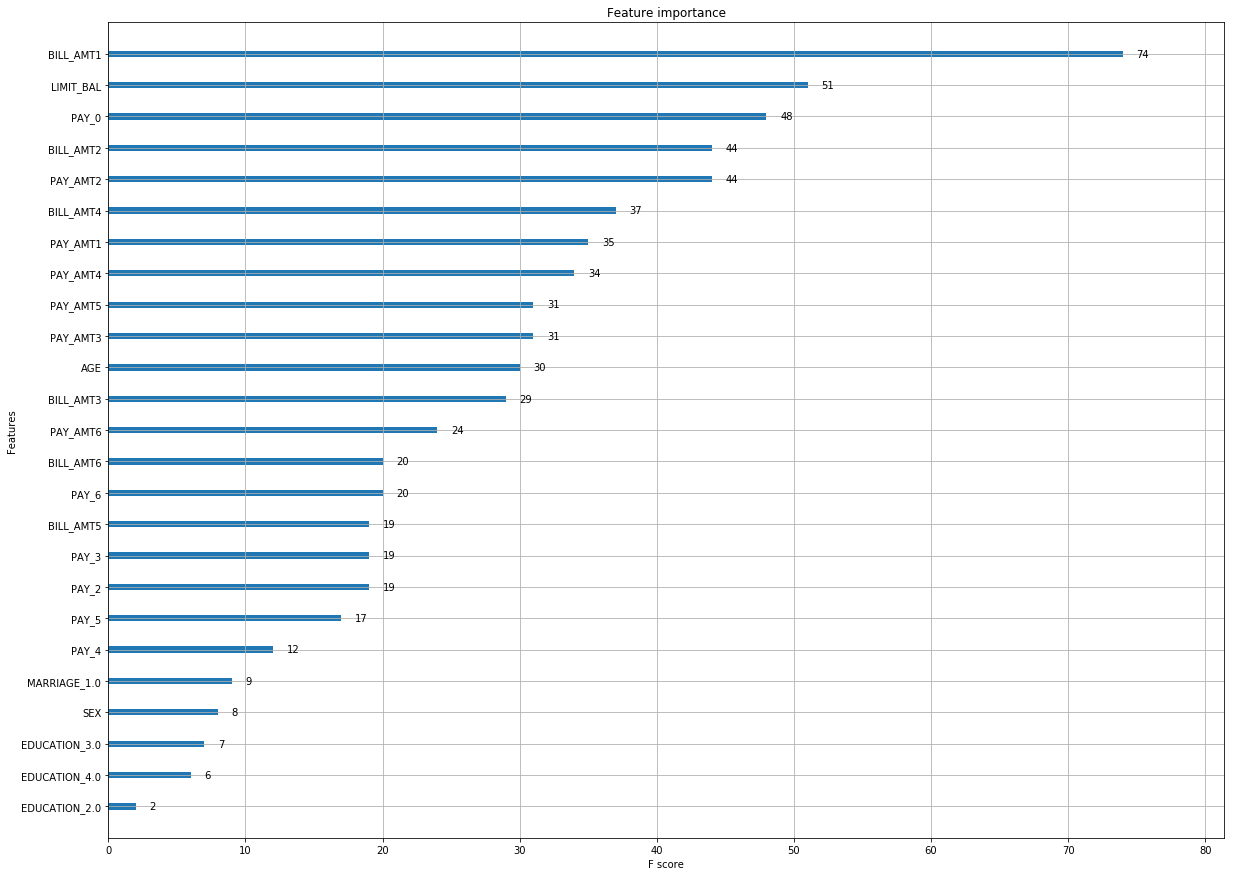

In [20]:
plt.figure(figsize=(20,15))
xgb.plot_importance(classifier, ax=plt.gca())

ExecutableNotFound: failed to execute ['dot', '-Tpng'], make sure the Graphviz executables are on your systems' PATH

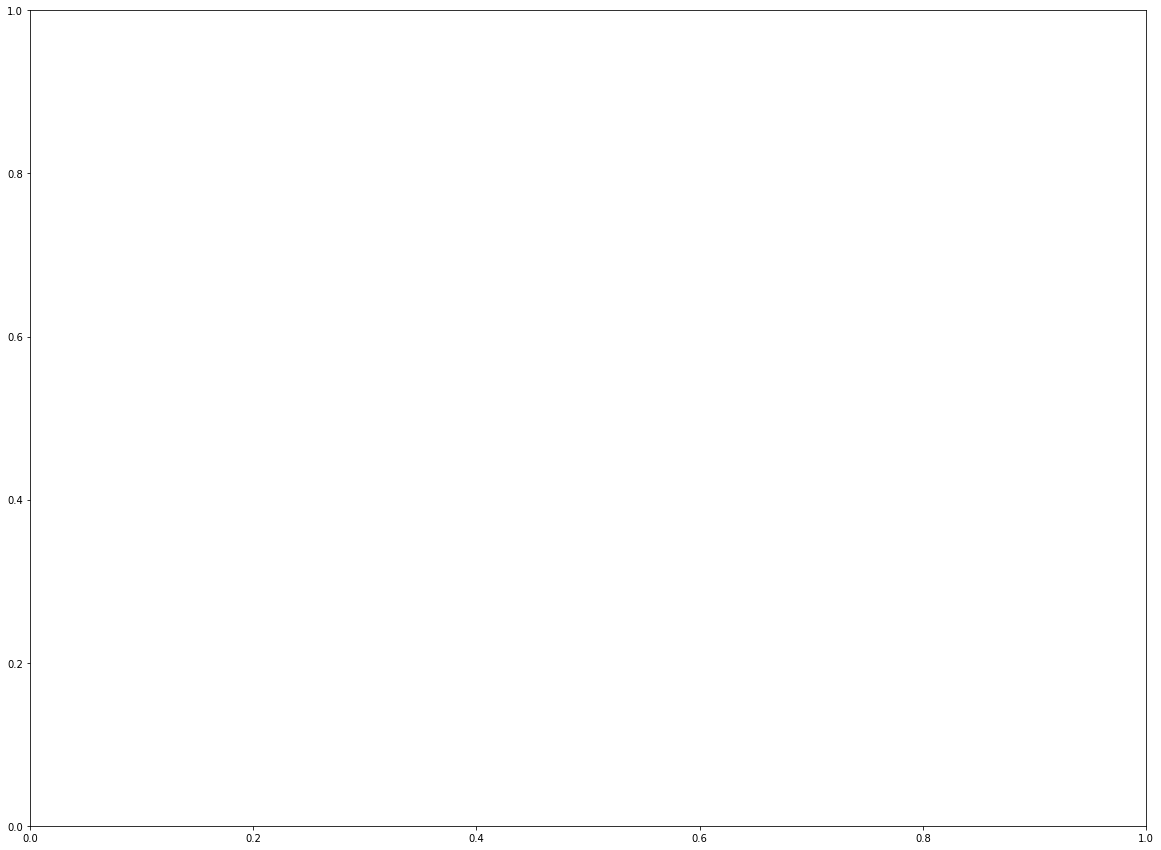

In [21]:
plt.figure(figsize=(20,15))
xgb.plot_tree(classifier, ax=plt.gca())

In [23]:
print("Number of boosting trees: {}".format(classifier.n_estimators))
print("Max depth of trees: {}".format(classifier.max_depth))
print("Objective function: {}".format(classifier.objective))

Number of boosting trees: 100
Max depth of trees: 3
Objective function: binary:logistic
